Numberical simulation

In [68]:
import base, constant
import numpy as np, qiskit
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import importlib
importlib.reload(constant)
importlib.reload(base)

<module 'base' from 'c:\\Users\\haime\\OneDrive\\Documents\\GitHub\\Lagrange interpolation approach for GPRX\\base.py'>

In [ ]:
step_sizes = base.create_logsin_step_sizes(0.01, 3, 0.1)
thetas = np.asarray([np.pi/2, np.pi/3, np.pi/6])

def f(thetas):
    qc = qiskit.QuantumCircuit(2,2)
    qc.rx(thetas[0], 0)
    qc.rz(thetas[1], 1)
    qc.cry(thetas[2], 0, 1)
    return base.zz_measure(qc)

true_grad = base.true_grad(thetas)

mean_MSE_stds = []
mean_MSE_finites = []
std_MSE_stds = []
std_MSE_finites = []
for step_size in step_sizes:
    print(step_size)
    grad_finites = []
    grad_stds = []

    for _ in range(0, 1):
        grad_finite = []
        grad_std = []
        for j in range(0, thetas.shape[0]):
            length = thetas.shape[0]
            f_left = f(thetas + step_size * base.unit_vector(j, length))
            f_right = f(thetas - step_size * base.unit_vector(j, length))
            if j != 2:
                grad_std.append(base.pseudo_two_prx(f, thetas, j, step_size))
            else:
                grad_std.append(base.pseudo_four_prx(f, thetas, j))
            grad_finite.append(base.two_finite_diff(f, thetas, j, step_size))
        grad_stds.append(mean_squared_error(grad_std, true_grad))
        grad_finites.append(mean_squared_error(grad_finite, true_grad))
    mean_MSE_stds.append(np.mean(grad_stds,axis = 0))
    std_MSE_stds.append(np.std(grad_stds,axis = 0))

    mean_MSE_finites.append(np.mean(grad_finites,axis = 0))
    std_MSE_finites.append(np.std(grad_finites,axis = 0))

### Mean 

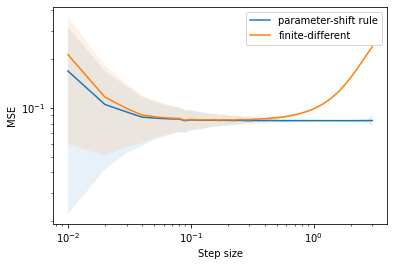

In [69]:
mean_MSE_stds = np.asarray(np.loadtxt('./ana2/mean_MSE_stds.txt'))
std_MSE_stds = np.asarray(np.loadtxt('./ana2/std_MSE_stds.txt'))
mean_MSE_finites = np.asarray(np.loadtxt('./ana2/mean_MSE_finites.txt'))
std_MSE_finites = np.asarray(np.loadtxt('./ana2/std_MSE_finites.txt'))

step_sizes = base.create_logsin_step_sizes(0.01, 3, 0.01)
mean_MSE_stds = np.asarray(mean_MSE_stds)
std_MSE_stds = np.asarray(std_MSE_stds)
mean_MSE_finites = np.asarray(mean_MSE_finites)
std_MSE_finites = np.asarray(std_MSE_finites)
plt.plot(step_sizes, mean_MSE_stds, label = "parameter-shift rule")
plt.fill_between(step_sizes, mean_MSE_stds - std_MSE_stds, mean_MSE_stds + std_MSE_stds, alpha=0.1)
plt.plot(step_sizes, mean_MSE_finites,  label = "finite-different")
plt.fill_between(step_sizes, mean_MSE_finites - std_MSE_finites, mean_MSE_finites + std_MSE_finites, alpha=0.1)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Step size")
plt.ylabel("MSE")
plt.legend()
plt.savefig('ana.svg', format='svg', dpi = 1000)

$\theta_x$

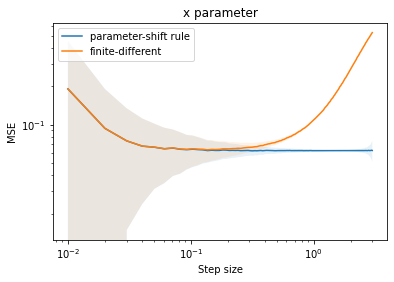

In [63]:
mean_MSE_stds = np.asarray(np.loadtxt('./ana2_x/mean_MSE_stds_x.txt'))
std_MSE_stds = np.asarray(np.loadtxt('./ana2_x/std_MSE_stds_x.txt'))
mean_MSE_finites = np.asarray(np.loadtxt('./ana2_x/mean_MSE_finites_x.txt'))
std_MSE_finites = np.asarray(np.loadtxt('./ana2_x/std_MSE_finites_x.txt'))

step_sizes = base.create_log_step_sizes(0.01, 3, 0.01)
mean_MSE_stds = np.asarray(mean_MSE_stds)
std_MSE_stds = np.asarray(std_MSE_stds)
mean_MSE_finites = np.asarray(mean_MSE_finites)
std_MSE_finites = np.asarray(std_MSE_finites)
plt.plot(step_sizes, mean_MSE_stds, label = "parameter-shift rule")
plt.fill_between(step_sizes, mean_MSE_stds - std_MSE_stds, mean_MSE_stds + std_MSE_stds, alpha=0.1)
plt.plot(step_sizes, mean_MSE_finites,  label = "finite-different")
plt.fill_between(step_sizes, mean_MSE_finites - std_MSE_finites, mean_MSE_finites + std_MSE_finites, alpha=0.1)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Step size")
plt.ylabel("MSE")
plt.title("x parameter")
plt.legend()
plt.savefig('ana_x.svg', format='svg', dpi = 1000)

$\theta_y$

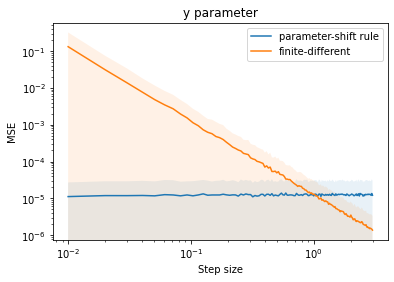

In [62]:
mean_MSE_stds = np.asarray(np.loadtxt('./ana2_y/mean_MSE_stds_y.txt'))
std_MSE_stds = np.asarray(np.loadtxt('./ana2_y/std_MSE_stds_y.txt'))
mean_MSE_finites = np.asarray(np.loadtxt('./ana2_y/mean_MSE_finites_y.txt'))
std_MSE_finites = np.asarray(np.loadtxt('./ana2_y/std_MSE_finites_y.txt'))

step_sizes = base.create_log_step_sizes(0.01, 3, 0.01)
mean_MSE_stds = np.asarray(mean_MSE_stds)
std_MSE_stds = np.asarray(std_MSE_stds)
mean_MSE_finites = np.asarray(mean_MSE_finites)
std_MSE_finites = np.asarray(std_MSE_finites)
plt.plot(step_sizes, mean_MSE_stds, label = "parameter-shift rule")
plt.fill_between(step_sizes, mean_MSE_stds - std_MSE_stds, mean_MSE_stds + std_MSE_stds, alpha=0.1)
plt.plot(step_sizes, mean_MSE_finites,  label = "finite-different")
plt.fill_between(step_sizes, mean_MSE_finites - std_MSE_finites, mean_MSE_finites + std_MSE_finites, alpha=0.1)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Step size")
plt.ylabel("MSE")
plt.title("y parameter")
plt.legend()
plt.savefig('ana_y.svg', format='svg', dpi = 1000)